In [21]:
import numpy as np #숫자 다루는 라이브러리(수치 연산, 벡터 연산 등)
import pandas as pd #데이터프레임 쉽게 다룰 수 있게 해주는 라이브러리
import matplotlib.pyplot as plt  
import seaborn as sns   #위, 아래는 데이터를 시각화 할 수 있는 라이브러리

plt.style.use('seaborn')  #시각화할 때 그림 스타일 자기가 선호하는 것고르기
sns.set(font_scale=2.5)  #크게 나옴

import missingno as msno  #null 데이터 쉽게 볼 수 있음, 편해서 씀

import warnings
warnings.filterwarnings('ignore') #matplotlib으로 그리고 show하면 새롭게 창 뜨면서 볼 수 있게 됨는데 inline하면 바로 볼 수 있음

%matplotlib inline

머신러닝 하려면 sklearn 반드시 쓸 줄 알아야 함.


책 사서 공부하기


pandas 이용해서 데이터분석 할 것

In [22]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.shape

(891, 12)

In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
for col in train_data.columns: 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train_data[col].isnull().sum() / train_data[col].shape[0]))
    print(msg)   #칼럼 별로 null값 얼마나 있는지 백분율로 나타낸 것

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [11]:
col

'Embarked'

In [12]:
train_data[col].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [13]:
train_data[col].isnull().sum() #True가 2개 있다는 것  #null이 2개라는 것

2

판다스의 기본 객체는 시리즈(index와 value로 이루어진 것)

In [7]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train_data[col].isnull().sum() / train_data[col].shape[0]  #이런 식으로 아래 백분율 나오는 것임

0.002244668911335578

In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
for col in test_data.columns: 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (test_data[col].isnull().sum() / test_data[col].shape[0]))
    print(msg)   #칼럼 별로 null값 얼마나 있는지 백분율로 나타낸 것

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


알고리즘에 따라  null 데이터 채워줘야 함.

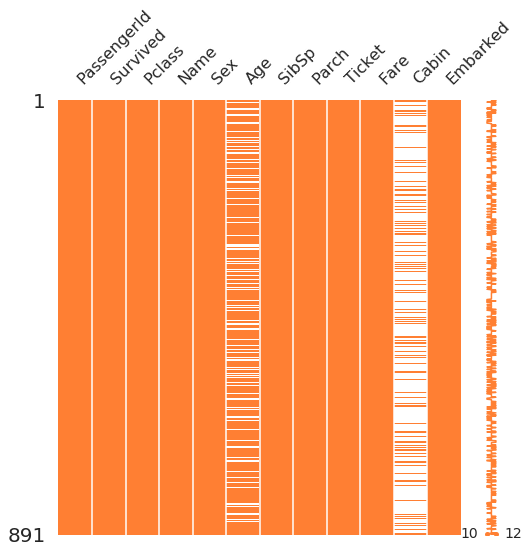

In [9]:
msno.matrix(df=train_data.iloc[:, :], figsize=(8, 8), color = (1, 0.5, 0.2))

빈칸이 null에 해당하는 것

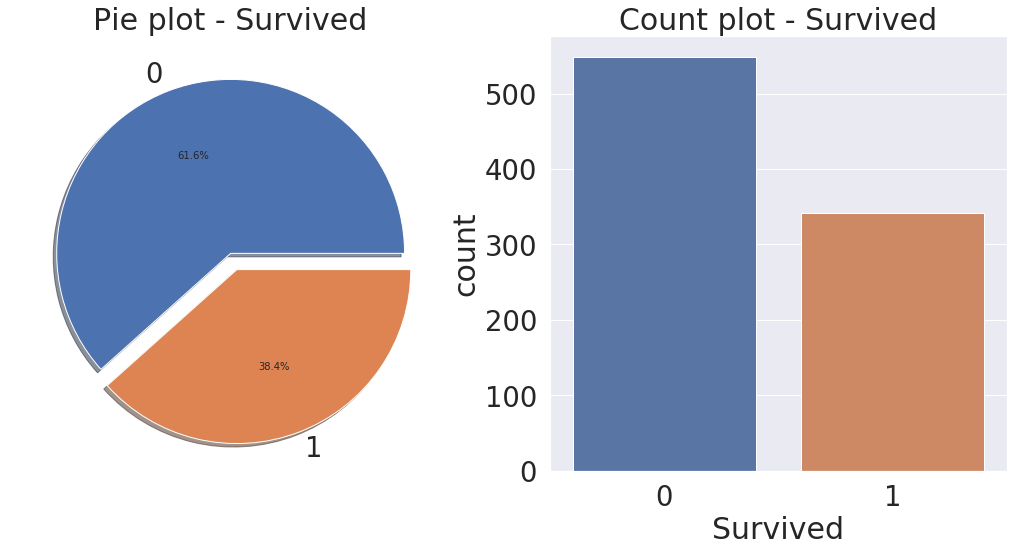

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))  #pyplot으로 그림 그릴 때 도화지 까는 과정 #1행 2열 #sub-> 하위 부분부분

train_data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = train_data, ax=ax[1])
ax[1].set_title('Count plot - Survived') 
plt.show()

코드 어떤 의미인지 잘 모르겠으면 하나하나씩 실행해보기

In [24]:
ax  #ax는 2개임

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdee52d2518>,
      dtype=object)

In [18]:
891 * 38.4  #이 만큼 살아남음

34214.4

In [19]:
train_data['Survived'].value_counts() #시리즈 -> 시리즈는 plot을 가짐

0    549
1    342
Name: Survived, dtype: int64

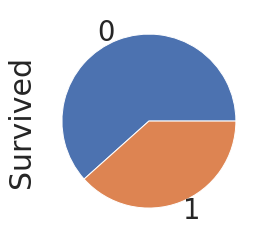

In [23]:
train_data['Survived'].value_counts().plot.pie() #파이로 표현 #이렇게 보명 어려우니까 짼다(explode) 나온 것

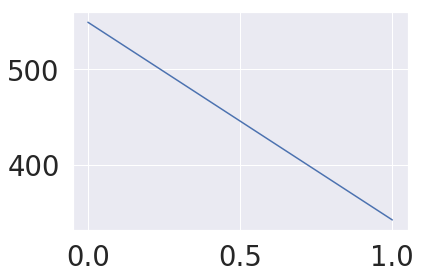

In [22]:
plt.plot(train_data['Survived'].value_counts())  #위에랑 같은 것임

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()  #그룹 별로 생존 몇 개 있는지

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
train_data[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [16]:
train_data['Survived'].unique()

array([0, 1])

In [17]:
pd.crosstab(train_data['Pclass'], train_data['Survived'], margins = True)  #이걸 보면 위에 꺼 해석 가능

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


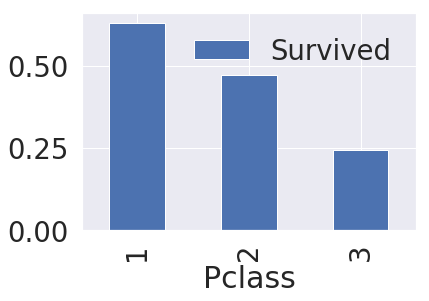

In [18]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(

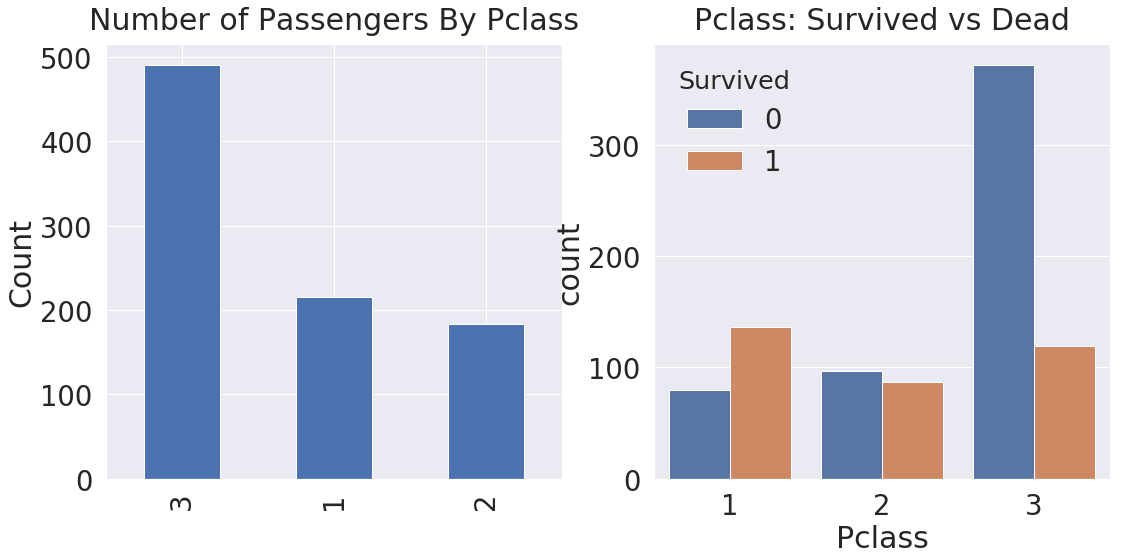

In [20]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train_data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data=train_data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

Before moving on, make sure that your code returns the output above.  The code above calculates the percentage of female passengers (in **train.csv**) who survived.

Then, run the code below in another code cell:

In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)